In [135]:
print("Hello World")

Hello World


In [136]:
import pandas as pd
df=pd.read_csv("ageSalery.csv")

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     5 non-null      int64
 1   salery  5 non-null      int64
dtypes: int64(2)
memory usage: 212.0 bytes


In [138]:
df

,age,salery
0,18,10000
1,20,12000
2,23,25000
3,30,45000
4,26,20000


In [139]:
for x in df.index:
    print(x,df.loc[x,'age'],df.loc[x,'salery'])

0 18 10000
1 20 12000
2 23 25000
3 30 45000
4 26 20000


In [140]:
from sklearn import linear_model
import matplotlib.pyplot as plt

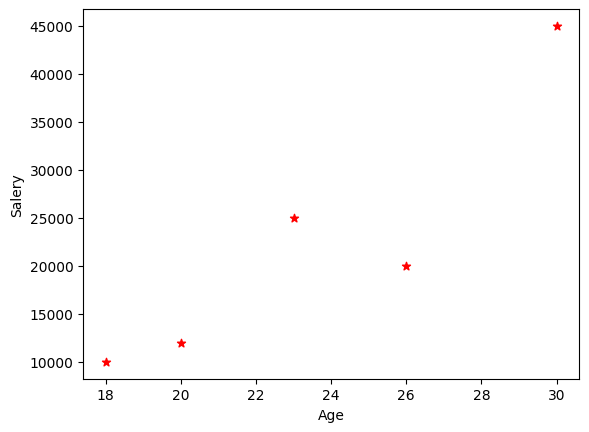

In [141]:
%matplotlib inline
plt.xlabel('Age')
plt.ylabel('Salery')
plt.scatter(df.age,df.salery,color='red',marker='*')

In [142]:
x=df.drop('salery', axis='columns')
print(type(x))
x

<class 'pandas.core.frame.DataFrame'>


,age
0,18
1,20
2,23
3,30
4,26


In [143]:
y=df.salery
y

0    10000
1    12000
2    25000
3    45000
4    20000
Name: salery, dtype: int64

In [144]:
#Now fitting this to Linear Regression Model
model=linear_model.LinearRegression()
model.fit(x.values,y.values)

LinearRegression()

In [145]:
#Pridicting value for age 35
model.predict([[23]])

array([21328.94736842])

In [146]:
import numpy as np

In [147]:
arr=np.array([[23],[20],[30]])
print(arr)
model.predict(arr)

[[23]
 [20]
 [30]]


array([21328.94736842, 13296.05263158, 40072.36842105])

In [148]:
arr=pd.DataFrame(data=[23,20,30],columns=['age'])
print(arr)
print(type(arr))
s=model.predict(arr.values)

   age
0   23
1   20
2   30
<class 'pandas.core.frame.DataFrame'>


In [149]:
arr['salery']=s
arr.to_csv("preditionwitharray.csv")

In [150]:
#Multi Varient Regression

In [151]:
import pandas as pd
from sklearn import linear_model


In [152]:
df2=pd.read_csv("homeprices.csv")
df2

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [153]:
#Handling Na values
m=df2.bedrooms.mean()
df2.bedrooms=df2.bedrooms.fillna(m)
df2

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.2,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [154]:
x=df2.drop(['age','price'],axis='columns')
y=df2.price
MultiModel=linear_model.LinearRegression()
MultiModel.fit(x.values,y.values)
MultiModel.predict([[1000,1]])

array([261658.97429448])

In [155]:
x=df2.drop('price',axis='columns')
y=df2.price
MultiModel=linear_model.LinearRegression()
MultiModel.fit(x.values,y.values)
MultiModel.predict([[3200,5,10]])

array([661952.35319064])

In [156]:
#One Hot Encoding Using pandas

In [157]:
import pandas as pd
df3=pd.read_csv('housePrices.csv')
df3

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [158]:
#Using pandas to create One hot encoding

In [159]:
dummies=pd.get_dummies(df3.town)
dummies

,monroe township,robinsville,west windsor
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
5,False,False,True
6,False,False,True
7,False,False,True
8,False,False,True
9,False,True,False


In [160]:
merged=pd.concat([df3,dummies], axis='columns')
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,True,False,False
1,monroe township,3000,565000,True,False,False
2,monroe township,3200,610000,True,False,False
3,monroe township,3600,680000,True,False,False
4,monroe township,4000,725000,True,False,False
5,west windsor,2600,585000,False,False,True
6,west windsor,2800,615000,False,False,True
7,west windsor,3300,650000,False,False,True
8,west windsor,3600,710000,False,False,True
9,robinsville,2600,575000,False,True,False


In [161]:
final=merged.drop('town',axis='columns')
final

,area,price,monroe township,robinsville,west windsor
0,2600,550000,True,False,False
1,3000,565000,True,False,False
2,3200,610000,True,False,False
3,3600,680000,True,False,False
4,4000,725000,True,False,False
5,2600,585000,False,False,True
6,2800,615000,False,False,True
7,3300,650000,False,False,True
8,3600,710000,False,False,True
9,2600,575000,False,True,False


In [162]:
x=final.drop('price',axis='columns')
x

,area,monroe township,robinsville,west windsor
0,2600,True,False,False
1,3000,True,False,False
2,3200,True,False,False
3,3600,True,False,False
4,4000,True,False,False
5,2600,False,False,True
6,2800,False,False,True
7,3300,False,False,True
8,3600,False,False,True
9,2600,False,True,False


In [163]:
y=final['price']
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [164]:
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(x.values,y.values)


LinearRegression()

In [165]:
model.predict(x.values)

array([539709.73984091, 590468.71640508, 615848.20468716, 666607.18125133,
       717366.1578155 , 579723.71533005, 605103.20361214, 668551.92431735,
       706621.15674047, 565396.15136531, 603465.38378844, 628844.87207052,
       692293.59277574])

In [166]:
model.predict([[3400,0,0,1]])

array([681241.66845839])

In [167]:
model.predict([[2800,0,1,0]])

array([590775.6396474])

In [168]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [169]:
newdf=df3
newdf.town=le.fit_transform(newdf.town)
newdf

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [170]:
newdf

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [171]:
x=newdf[['town','area']]
x

,town,area
0,0,2600
1,0,3000
2,0,3200
3,0,3600
4,0,4000
5,2,2600
6,2,2800
7,2,3300
8,2,3600
9,1,2600


In [172]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('town', OneHotEncoder(), [0])], remainder = 'passthrough')

In [173]:
x = ct.fit_transform(x)
x

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [174]:
# now we have to remove first column 
x=x[:,1:]
x

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [175]:
y=newdf.price.values
y

array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
       710000, 575000, 600000, 620000, 695000], dtype=int64)

In [176]:
model=linear_model.LinearRegression()
model

LinearRegression()

In [177]:
model.fit(x,y)

LinearRegression()

In [178]:
model.predict([[0,1,3400]])

array([681241.6684584])

In [179]:
#Exercise on car data set

In [180]:
import pandas as pd
from sklearn import linear_model
df=pd.read_csv('car.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [181]:
#first way of encoding using pandas itself

In [182]:
dummy=pd.get_dummies(df['Car Model'])
dummy

,Audi A5,BMW X5,Mercedez Benz C class
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
5,True,False,False
6,True,False,False
7,True,False,False
8,True,False,False
9,False,False,True


In [183]:
merged=pd.concat([df,dummy],axis='columns')
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,False,True,False
1,BMW X5,35000,34000,3,False,True,False
2,BMW X5,57000,26100,5,False,True,False
3,BMW X5,22500,40000,2,False,True,False
4,BMW X5,46000,31500,4,False,True,False
5,Audi A5,59000,29400,5,True,False,False
6,Audi A5,52000,32000,5,True,False,False
7,Audi A5,72000,19300,6,True,False,False
8,Audi A5,91000,12000,8,True,False,False
9,Mercedez Benz C class,67000,22000,6,False,False,True


In [184]:
final=merged.drop('Car Model',axis='columns')
final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,69000,18000,6,False,True,False
1,35000,34000,3,False,True,False
2,57000,26100,5,False,True,False
3,22500,40000,2,False,True,False
4,46000,31500,4,False,True,False
5,59000,29400,5,True,False,False
6,52000,32000,5,True,False,False
7,72000,19300,6,True,False,False
8,91000,12000,8,True,False,False
9,67000,22000,6,False,False,True


In [185]:
x=final.drop('Sell Price($)',axis='columns')
x

,Mileage,Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,69000,6,False,True,False
1,35000,3,False,True,False
2,57000,5,False,True,False
3,22500,2,False,True,False
4,46000,4,False,True,False
5,59000,5,True,False,False
6,52000,5,True,False,False
7,72000,6,True,False,False
8,91000,8,True,False,False
9,67000,6,False,False,True


In [186]:
y=final['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [187]:
from sklearn import linear_model
model=linear_model.LinearRegression()

In [188]:
model.fit(x.values,y.values)

LinearRegression()

In [189]:
model.predict([[45000,4,0,0,1]])

array([36991.31721061])

In [190]:
model.predict([[86000,7,0,1,0]])

array([11080.74313219])

In [191]:
#Logistic Regression

In [192]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt

In [193]:
df=pd.read_csv('insurance_data.csv')
# df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 564.0 bytes


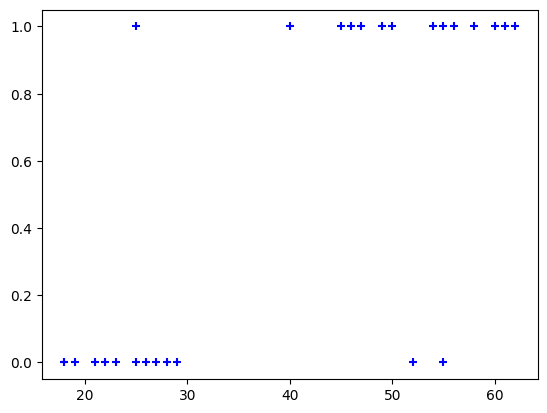

In [194]:
plt.scatter(df.age,df.bought_insurance, marker='+', color='blue')

In [195]:
from sklearn.model_selection import train_test_split

In [196]:
x=df[['age']]
x

,age
0,22
1,25
2,47
3,52
4,46
5,56
6,55
7,60
8,62
9,61


In [197]:
y=df.bought_insurance
y

0     0
1     0
2     1
3     0
4     1
5     1
6     0
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    1
15    1
16    1
17    1
18    0
19    0
20    0
21    0
22    1
23    1
24    1
25    1
26    0
Name: bought_insurance, dtype: int64

In [198]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8)

In [199]:
len(xtrain)

21

In [200]:
len(xtest)

6

In [201]:
model=linear_model.LogisticRegression()

In [202]:
model.fit(xtrain.values,ytrain.values)

LogisticRegression()

In [203]:
xtest

,age
24,50
13,29
20,21
8,62
26,23
18,19


In [204]:
ytest

24    1
13    0
20    0
8     1
26    0
18    0
Name: bought_insurance, dtype: int64

In [205]:
model.predict(xtest.values)

array([1, 0, 0, 1, 0, 0], dtype=int64)

In [206]:
model.predict([[35]])

array([0], dtype=int64)

In [207]:
c=model.predict([[60]])
if c[0]==0:
    print("not bought")
else:
    print("bought")

bought


In [208]:
model.predict_proba(xtest.values)

array([[0.19915894, 0.80084106],
       [0.73099174, 0.26900826],
       [0.87108663, 0.12891337],
       [0.05963809, 0.94036191],
       [0.84328361, 0.15671639],
       [0.89457378, 0.10542622]])

In [209]:
#     y=mx+c
# slope
m=model.coef_
m=m[0,0]
m

0.11386758998571347

In [210]:
# intercept
c=model.intercept_
c=c[0]
c

-4.301820193502839

In [211]:
#Testing it on Sigmoid concept

In [212]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [213]:
def prediction_function(age):
    z = m * age + c
    y = sigmoid(z)
    return y

In [214]:
age = 35
prediction_function(age)

0.42154004481672264

In [215]:
xtest

,age
24,50
13,29
20,21
8,62
26,23
18,19


In [216]:
ytest

24    1
13    0
20    0
8     1
26    0
18    0
Name: bought_insurance, dtype: int64

In [217]:
age = xtest.values

i=0
j=0
l=len(xtest)
for k in range(l):
    val=age[k,0]
    print(prediction_function(val))

0.8008410607617361
0.269008258176939
0.12891337001246866
0.9403619121144975
0.1567163858172627
0.10542622243635749


In [225]:
#Exercise 
import pandas as pd
df=pd.read_csv('HR_comma_sep.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [228]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [219]:
left=df[df.left==1]
left.shape

(3571, 10)

In [220]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [221]:
result = df['left'].mean()
print(result)

0.2380825388359224


In [224]:
df.groupby('left').mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<Axes: xlabel='salary'>

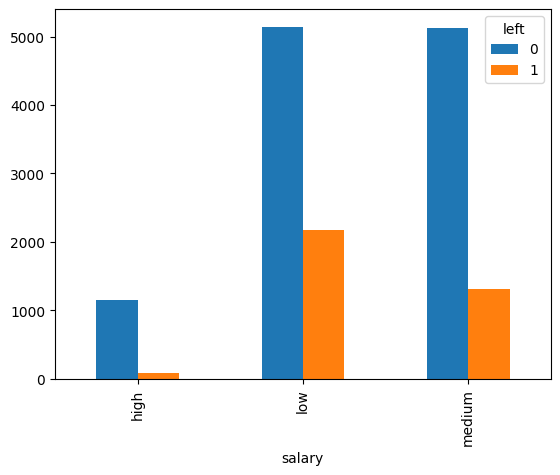

In [229]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

<Axes: xlabel='Department'>

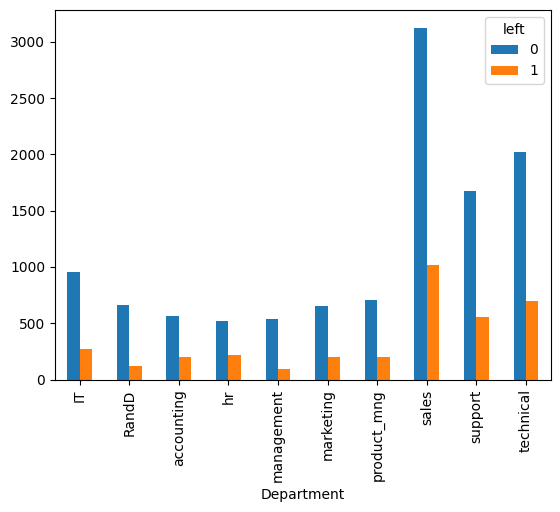

In [230]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

<h1>From the data analysis so far we can conclude that we will use following variables as independant variables in our model</h1>
<p>
**Satisfaction Level**
**Average Monthly Hours**
**Promotion Last 5 Years**
**Salary**
</p>

In [240]:
#Now we decided our independt variable (x) 
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [246]:
#Here salery column has string or object value or dummy variable so we have to change it 
#into number so we can use one hot encoding
salary_dummies =pd.get_dummies(subdf.salary)
salary_dummies 

,high,low,medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False
...,...,...,...
14994,False,True,False
14995,False,True,False
14996,False,True,False
14997,False,True,False


In [247]:
#Here salery column has string or object value or dummy variable so we have to change it 
#into number so we can use one hot encoding
salary_dummies =pd.get_dummies(subdf.salary, prefix="salary")
salary_dummies 

,salary_high,salary_low,salary_medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False
...,...,...,...
14994,False,True,False
14995,False,True,False
14996,False,True,False
14997,False,True,False


In [249]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False


In [254]:
X=df_with_dummies.drop('salary', axis='columns')
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [252]:
#Dependent Variable y
y=df.left
y.head()


0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [255]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)


In [256]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [257]:
model.fit(X_train, y_train)

LogisticRegression()

In [269]:
y_test

11623    0
4891     0
2028     0
7503     0
13584    0
        ..
14360    1
14597    1
11457    0
11321    0
5883     0
Name: left, Length: 10500, dtype: int64

In [261]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [270]:
model.predict([[0.11,272,0,False,False,True]])

C:\Users\Arav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [259]:
model.score(X_test,y_test)

0.7752380952380953